![Titre](TPE-Ascenseur-Spatial/TPE-Ascenseur-Spatial.001.jpeg)

## La physique de l'ascenseur spatial

Nous allons d'abord charger les librairies Python de Mathematiques (numpy) et de représentation graphique (matplotlib).   
Sans numpy nous n'aurions pas de fonction racine (sqrt).   
Quant à matplotlib, il s'agit d'une librairie qui fonctionne un peu comme la calculatrice du Lyçée et nous permet de tracer des courbes.


In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [31]:
#print(plt.style.available)
plt.style.use('presentation')

Définissons ensuite les constantes utilisées:

In [5]:
G  = 6.67E-11    # Constante de gravitation universelle en m(3)*s(-2)*kg(-1)
Mt = 5.98E24     # Masse de la terre en kg  
Rt = 6378E3      # Rayon  de la terre en m

# 1. Movement orbital 
![Titre](TPE-Ascenseur-Spatial/TPE-Ascenseur-Spatial.002.jpeg)

Nous devons calculer la vitesse de rotation de la terre et la hauteur de l'orbite géostationnaire.
Nous en profiterons aussi pour calculer l'accélération à la surface de la terre.

### 1.1. Calcul de la vitesse de rotation de la terre
Soit Wt la vitesse angulaire de rotation de la terre, en radians par seconde:

In [6]:
Wt = (2*np.pi)/(24*60*60)
print("Vitesse de rotation de la terre = ",Wt,"Radians/seconde")
print("Vitesse de rotation de la terre = ",round (Wt,7),"Radians/seconde")

Vitesse de rotation de la terre =  7.27220521664304e-05 Radians/seconde
Vitesse de rotation de la terre =  7.27e-05 Radians/seconde


### 1.2 Fonctions accélération
Nous allons définir des fonctions pour l'accélération gravitationnelle et l'accélération centrifuge.

In [7]:
def AccGravitationnelle (r):
    AccGravitationnelle = (G*Mt)/(r**2)
    return AccGravitationnelle

def AccCentrifuge (r):
    AccCentrifuge = r * (Wt**2)
    return AccCentrifuge

def AccTotale (r):
    AccTotale = AccGravitationnelle(r) - AccCentrifuge(r)
    return AccTotale

**Exemple:** Calcul de l'accélération gravitationnelle à la surface de la terre:

In [8]:
print("Accélération gravitationnelle à la surface de la terre:",AccGravitationnelle(Rt), "(m.s-2)")
print("Accélération gravitationnelle à la surface de la terre:",round(AccGravitationnelle(Rt),2), "(m.s-2)")

Accélération gravitationnelle à la surface de la terre: 9.805234578215078 (m.s-2)
Accélération gravitationnelle à la surface de la terre: 9.81 (m.s-2)


**Exemple:** Calcul de l'accélération centrifuge à la surface de la terre:

In [9]:
print("Accélération centrifuge à la surface de la terre:",round(AccCentrifuge(Rt),9), "(m.s-2)")

Accélération centrifuge à la surface de la terre: 0.033730033 (m.s-2)


### 1.3 Calcul de la hauteur de l'orbite geostationnaire
Nous pouvons calculer la valeur exacte de l'orbite geostationnaire. Cette valeur doit 

In [10]:
Rg =((G*Mt)/(Wt**2))**(1/3)
Hg = (Rg - Rt)

print("Rayon de l'orbite geostationnaire:", int (Rg/1000), 'km')
print("Hauteur de l'orbite geostationnaire:", int (Hg/1000), 'km')


Rayon de l'orbite geostationnaire: 42250 km
Hauteur de l'orbite geostationnaire: 35872 km


#### Représentation graphique:
Nous allons tracer les courbes des deux accélérations, gravitationelle et centrifuge.
Elles devraient se croiser dans un point d'abcisse r = 42241 km.
Le rayon r prendra des valeurs entre 6.000 km et 160.000 km

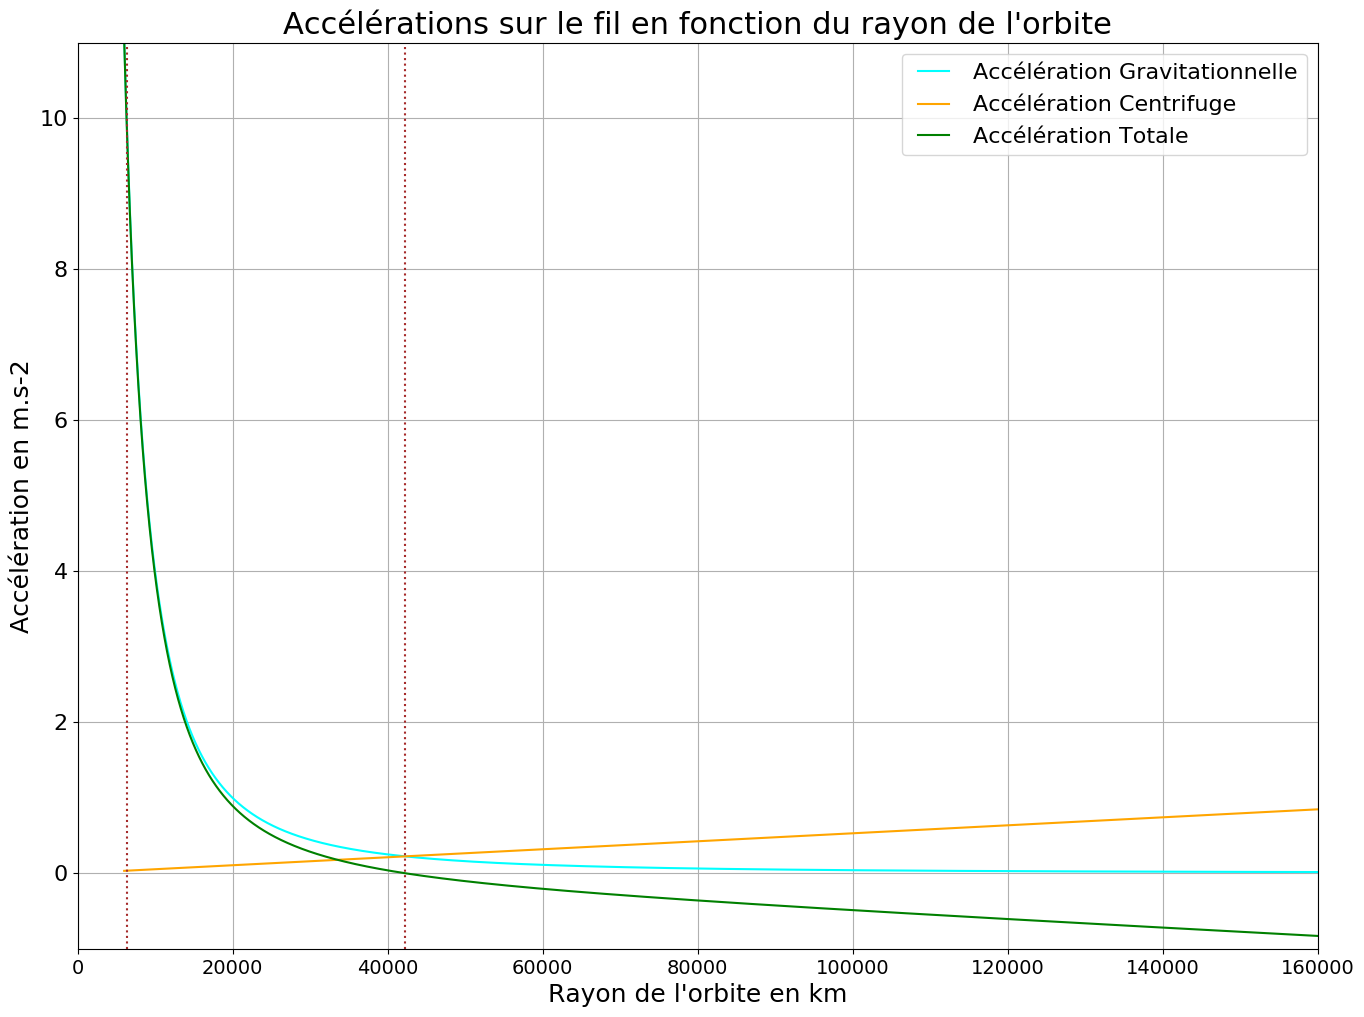

In [11]:
r = np.arange(6E6, 160E6, 1E3)
r_km = r*1E-3

plt.figure(figsize=(16, 12), dpi= 100)

plt.plot(r_km,  AccGravitationnelle(r), color="cyan",   label='Accélération Gravitationnelle')
plt.plot(r_km,  AccCentrifuge(r),       color="orange", label='Accélération Centrifuge' )
plt.plot(r_km,  AccTotale(r),           color="green",  label='Accélération Totale' )

plt.axvline(x=Rt*1E-3, linestyle=":", color="brown")

plt.axvline(x=Rg*1E-3, linestyle=":", color="brown")

plt.xlabel("Rayon de l'orbite en km", fontsize=18)
plt.ylabel("Accélération en m.s-2", fontsize=18)
plt.axis([0, 160E3, -1, 11])

plt.grid()
plt.title("Accélérations sur le fil en fonction du rayon de l'orbite", fontsize=22)
plt.legend(loc='upper right', fontsize=16, fancybox='true')
plt.savefig('images/Accelerations.png')

plt.show()



Nous observons que la Force totale s'annule pour le rayon de l'orbite géostationnaire. Cette courbe verte nous montre la force par unité de longueur et par unité de masse exercée sur chaque point du cable. La force est négative (attractive) au desssous de l'orbite géostationnaire et elle est positive au dessus.


# 2. Le cable
Notre but dans cette deuxième partie est de 

## 2.1 L'idée d'equilibre:
Nous voulons comprendre pourquoi le cable est capable de se maintenir verticalement sans exercer de force sur la surface terrestre. 
Intuitivement, il semble que le cable sera en équilibre lorsque les deux parties exerceront la même force.   
La valeur exacte de Rf est pour l'instant inconnue. La documentation indique une valeur de 150.000 km que nous utiliserons pour tracer les courbes. Nous vérifierons cette valeur plus tard.

In [12]:
Rf = 150000E3

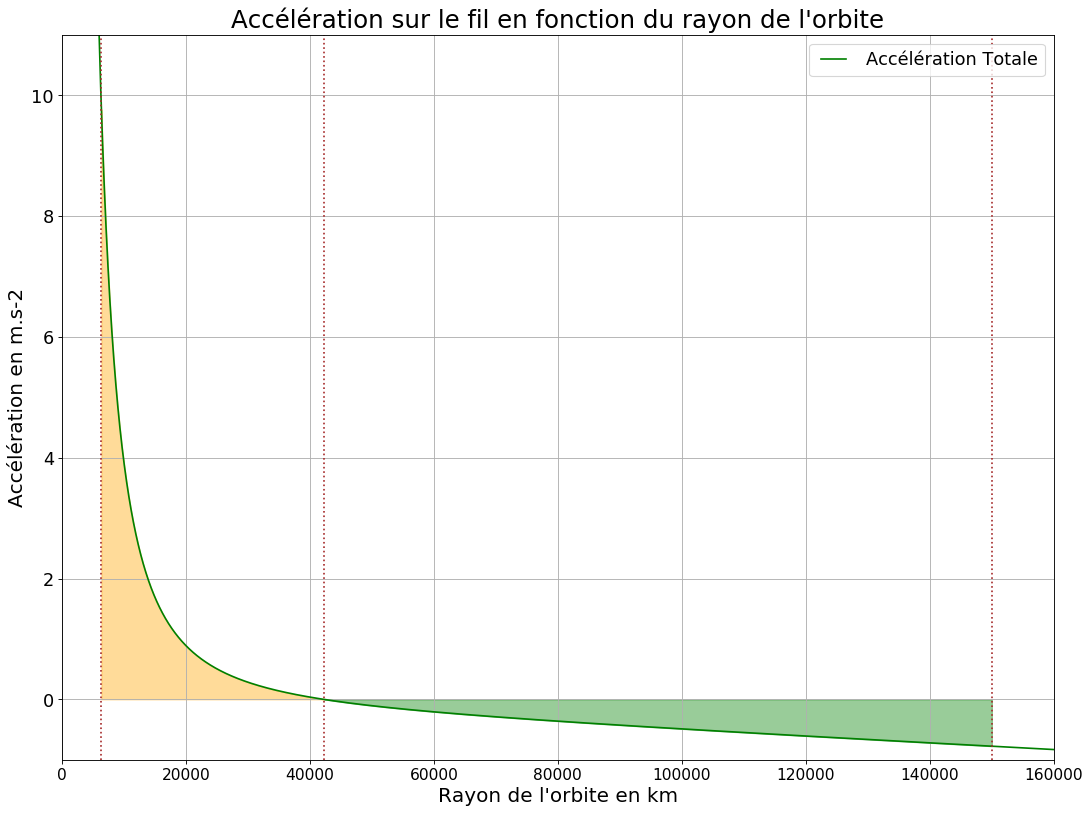

In [13]:
r = np.arange(6E6, 160E6, 1E3)
r_km = r*1E-3

plt.figure(figsize=(16, 12), dpi= 80)

plt.plot(r_km,  AccTotale(r), color="green", label='Accélération Totale' )

#Lignes verticales délimitent les trois rayons:
plt.axvline(x=Rt*1E-3, linestyle=":", color="brown")
plt.axvline(x=Rg*1E-3, linestyle=":", color="brown")
plt.axvline(x=Rf*1E-3, linestyle=":", color="brown")

plt.fill_between(r_km, AccTotale(r), 0, where=(r_km > Rt*1E-3)&(r_km < Rg*1E-3), color='orange', alpha=.4)
plt.fill_between(r_km, AccTotale(r), 0, where=(r_km > Rg*1E-3)&(r_km < Rf*1E-3), color="green", alpha=.4)

plt.xlabel("Rayon de l'orbite en km")
plt.ylabel("Accélération en m.s-2")
plt.axis([0, 160E3, -1, 11])

plt.grid()
plt.title("Accélération sur le fil en fonction du rayon de l'orbite")
plt.legend(loc='upper right')
plt.savefig('images/Equilibre.png')

plt.show()


## 2.2 La modélisation du cable
Nous voulons comprendre pourquoi le cable est capable de se maintenir verticalement sans exercer de force sur la surface terrestre. 
Intuitivement, il semble que le cable sera en équilibre lorsque les deux parties exerceront la même force, l'une positive et l'autre négative, sur le point de rencontre, Rg.   
Le schéma suivant montre la courbe de l'accélération totale encadrée par des valeurs par défaut et par excès.

Nombre de maillons: 16 ; Longueur d'un maillon: 2242.0 km


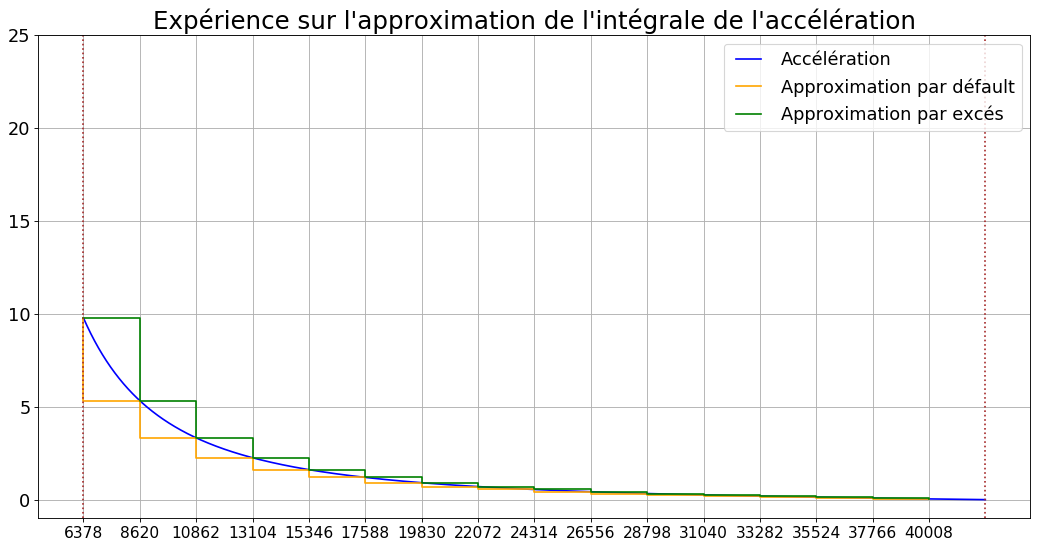

In [32]:
NombreMaillons = 16

LongueurMaillon = 1E-3*(Rg-Rt)/NombreMaillons
print("Nombre de maillons:", NombreMaillons, "; Longueur d'un maillon:",round(LongueurMaillon,0), "km")

fig, ax = plt.subplots(figsize=(16, 8))

ax.set_xticks(np.arange(Rt*1E-3, Rg*1E-3, LongueurMaillon))

r = np.arange(Rt, Rg, 1E3)
r_km = r*1E-3

plt.plot(r_km, AccTotale(r), color="blue", label="Accélération")

r = np.arange(Rt, Rg, LongueurMaillon*1E3)
r_km = r*1E-3

plt.step(r_km, AccTotale(r), where='pre', color="orange", label="Approximation par défault")
plt.step(r_km, AccTotale(r), where='post', color="green", label="Approximation par excés")

plt.axvline(x=Rt*1E-3, linestyle=":", color="brown")
plt.axvline(x=Rg*1E-3, linestyle=":", color="brown")

ax.grid(markevery=LongueurMaillon)

plt.ylim(-1, 25)
plt.legend(loc='upper right')
plt.title("Expérience sur l'approximation de l'intégrale de l'accélération")

plt.savefig('images/Integrale.png')
plt.show()

#### Solution de l'intégrale:
Nous allons introduire une autre fonction que nous appelerons IntegraleAcc. 
Cette fonction est une primitive de la fonction AccTotale, sa dérivée en r est égale à AccTotale. La valeur de cette primitive pour r=Rt est nulle.    

In [15]:
def IntegraleAcc (r):
    IntegraleAcc = G*Mt*( -1/r - (r**2)/(2*Rg**3) + 1/Rt + (Rt**2)/(2*Rg**3))
    return IntegraleAcc

## Encadrer l'accélération

6378000.0
Nombre de maillons: 16 ,Longueur d'un maillon: 2242.0 km


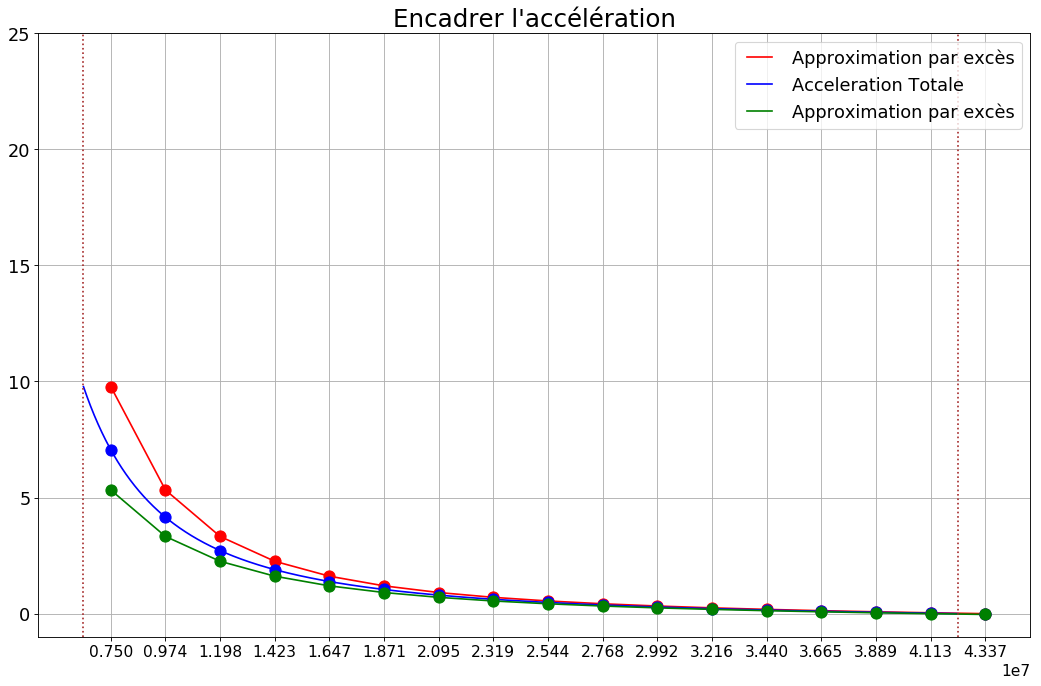

In [30]:
NombreMaillons = 16
print(Rt)
LongueurMaillon = (Rg-Rt)/NombreMaillons
print("Nombre de maillons:", NombreMaillons, ",Longueur d'un maillon:",round(LongueurMaillon*1E-3,0), "km")

# Maillons est la liste 
Maillons_pre  = np.linspace(Rt, Rg,NombreMaillons+1)
Maillons      = Maillons_pre + LongueurMaillon/2
Maillons_post = Maillons_pre + LongueurMaillon

Acc_pre  = AccTotale(Maillons_pre)
Acc      = AccTotale(Maillons)
Acc_post = AccTotale(Maillons_post)

# Obtenir les valeurs maximum et minimum de l'accélération

AccMax = np.maximum (Acc_pre,Acc_post)
AccMin = np.minimum (Acc_pre,Acc_post)

# Représentation graphique:
r = np.arange(Rt, Rg, 1E3)
r_km = r*1E-3

plt.figure(figsize=(16, 10), dpi= 80, facecolor='w', edgecolor='k')

plt.plot(Maillons, AccMax, color='red', label='Approximation par excès')
plt.plot(r, AccTotale(r), color='blue', label="Acceleration Totale")
plt.plot(Maillons, AccMin, color='green', label="Approximation par excès")


plt.plot(Maillons, AccMax,'ro')
plt.plot(Maillons, Acc,   'bo')
plt.plot(Maillons, AccMin,'go')

plt.xticks(Maillons)
plt.ylim(-1, 25)

plt.grid()
plt.axvline(x=Rt, linestyle=":", color="brown")
plt.axvline(x=Rg, linestyle=":", color="brown")

plt.legend()
plt.title("Encadrer l'accélération")
plt.savefig('images/AccMaxMin.png')


plt.show()


## Approximation de la Tension
Nous allons utiliser l'encadrement de l'accélération pour réaliser l'expérience de l'approximation de la Tension.   
Nous pouvons calculer les approximations par défaut et par excès de la Tension pour différentes valeurs du nombre de maillons.

6378000.0
Nombre de maillons: 16 ,Longueur d'un maillon: 2242.0 km


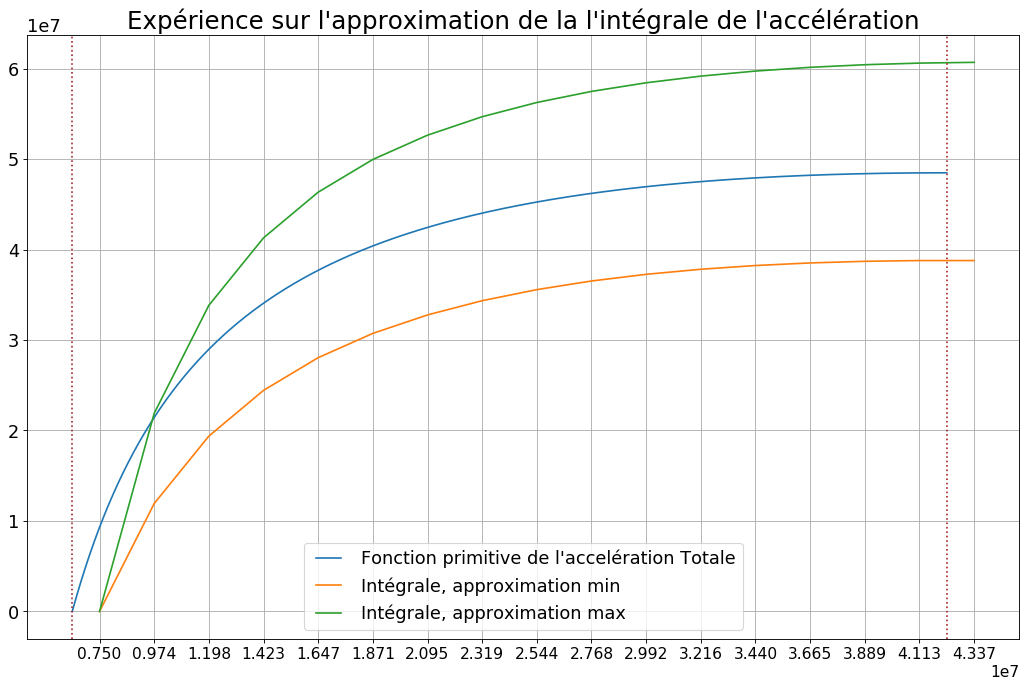

In [41]:
NombreMaillons = 16
print(Rt)
LongueurMaillon = (Rg-Rt)/NombreMaillons
print("Nombre de maillons:", NombreMaillons, ",Longueur d'un maillon:",round(LongueurMaillon*1E-3,0), "km")

# Maillons est la liste 
Maillons_pre  = np.linspace(Rt, Rg,NombreMaillons+1)
Maillons      = Maillons_pre + LongueurMaillon/2
Maillons_post = Maillons_pre + LongueurMaillon

Acc_pre  = AccTotale(Maillons_pre)
Acc      = AccTotale(Maillons)
Acc_post = AccTotale(Maillons_post)

# Obtenir les valeurs maximum et minimum de l'accélération

AccMax = np.maximum (Acc_pre,Acc_post)
AccMin = np.minimum (Acc_pre,Acc_post)

#Surface de chaque maillon.

Aire_max     = LongueurMaillon*AccMax
Aire_min     = LongueurMaillon*AccMin

Int_min      = [0]*(NombreMaillons+1)
Int_max      = [0]*(NombreMaillons+1)

#Calculer les approximations

for i in range(NombreMaillons+1):
    Int_min[i]  = sum(Aire_min[0:i] ) 
    Int_max[i]  = sum(Aire_max[0:i] )

# Représentation graphique:
r = np.arange(Rt, Rg, 1E3)
r_km = r*1E-3

plt.figure(figsize=(16, 10), dpi= 80, facecolor='w', edgecolor='k')

plt.plot(r, IntegraleAcc(r), label="Fonction primitive de l'accelération Totale")
plt.plot(Maillons, Int_min,   label='Intégrale, approximation min')
plt.plot(Maillons, Int_max,   label='Intégrale, approximation max')

plt.xticks(Maillons)

plt.axvline(x=Rt, linestyle=":", color="brown")
plt.axvline(x=Rg, linestyle=":", color="brown")

plt.grid()

plt.legend(loc='lower center')
plt.title("Expérience sur l'approximation de la l'intégrale de l'accélération")
plt.savefig('images/Tension-16.png')


plt.show()


## 2.3 Calcul du contrepoids et de la longueur du cable:
Nous allons calculer la valeur exacte de Rf avec la formule que nous avons trouvée dans l'article 'Physics of the space elevator'. Cette valeur doit correspondre sur le graphique ci-dessus au deuxième point pour lequel la Tension s'annule.

In [19]:
# Rf: rayon du bout final du cable, tension nulle
# Valeur théorique trouvée dans la documentation, "Physics of the Space Elevator"
Rf = (Rt/2)*( np.sqrt(1+8*(Rg/Rt)**3) - 1)
LongueurCable = Rf-Rt
print ("Rayon final: Rf=",int(Rf*1E-3),"km")
print ("Longueur totale du cable, LongueurCable =", int(LongueurCable*1E-3),"km")

Rayon final: Rf= 150631 km
Longueur totale du cable, LongueurCable = 144253 km


Ci-dessous, en deux plots séparés:

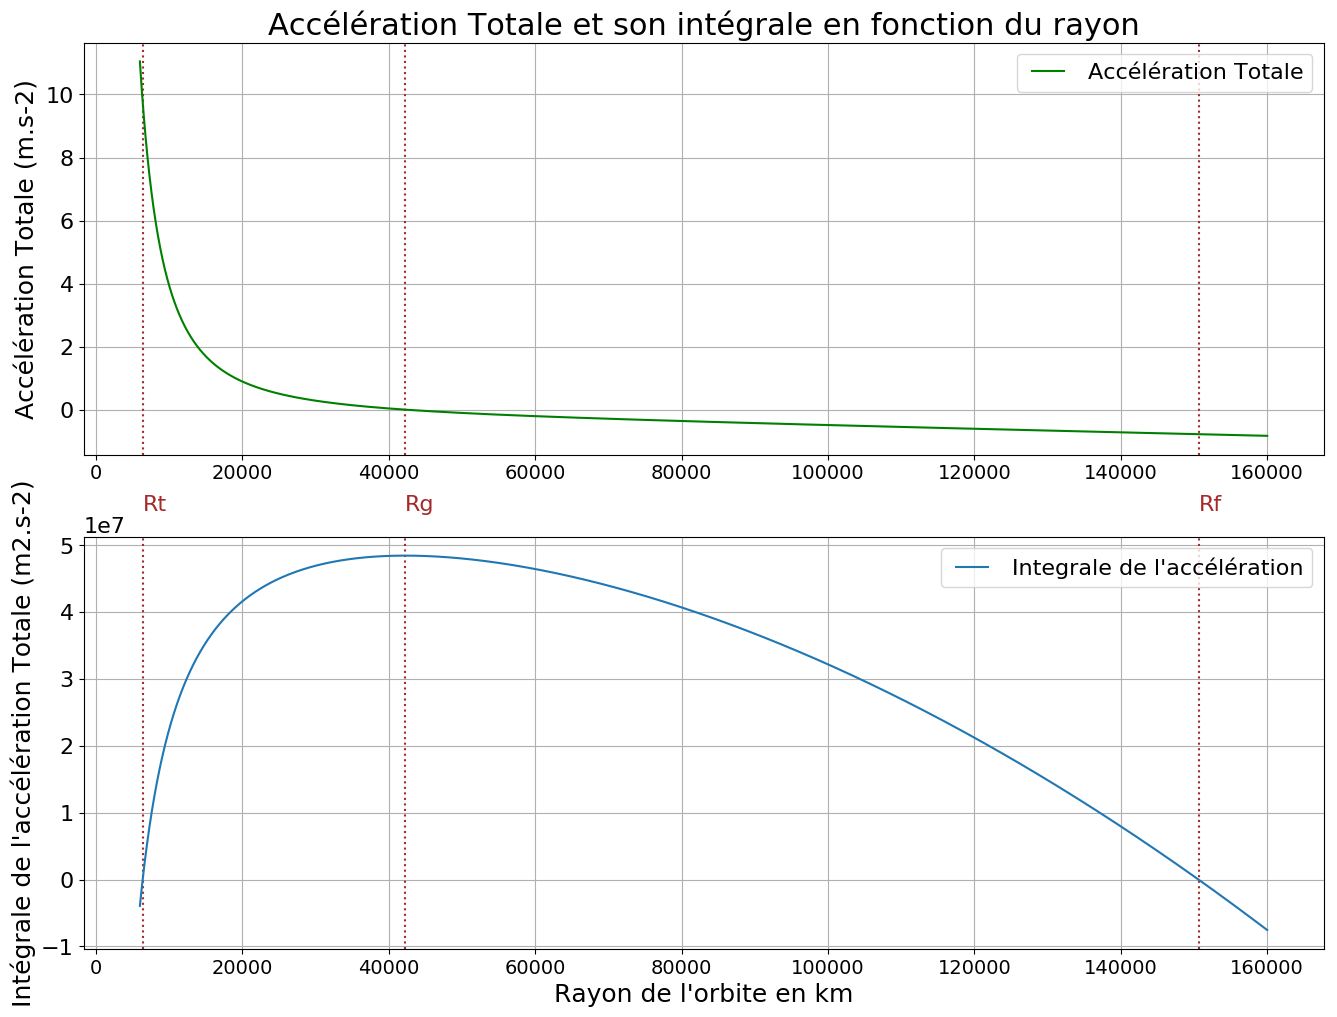

In [20]:
r = np.arange(6E6, 160E6, 1E3)
r_km = r*1E-3

plt.figure(figsize=(16, 12), dpi= 100, facecolor='w', edgecolor='k')

#Première figure: 2 rangées, 1 colonne, figure 1
plt.subplot(211)

plt.title("Accélération Totale et son intégrale en fonction du rayon")

plt.axvline(x=Rt*1E-3, linestyle=":", color="brown")
plt.text(Rt*1E-3, -3.2, 'Rt', fontsize ='16', color="brown")

plt.axvline(x=Rg*1E-3, linestyle=":", color="brown")
plt.text(Rg*1E-3, -3.2, 'Rg', fontsize ='16', color="brown")

plt.axvline(x=Rf*1E-3, linestyle=":", color="brown")
plt.text(Rf*1E-3, -3.2, 'Rf', fontsize ='16', color="brown")

plt.ylabel("Accélération Totale (m.s-2)")

plt.plot(r_km,  AccTotale(r), color="green",  linewidth='1.5', label="Accélération Totale")

plt.legend()
plt.grid()

#Deuxième figure: 2 rangées, 1 colonne, figure 2
plt.subplot(212)

plt.axvline(x=Rt*1E-3, linestyle=":", color="brown")

plt.axvline(x=Rg*1E-3, linestyle=":", color="brown")
plt.axvline(x=Rf*1E-3, linestyle=":", color="brown")

plt.plot(r_km, IntegraleAcc(r), label="Integrale de l'accélération")
plt.xlabel("Rayon de l'orbite en km")
plt.ylabel("Intégrale de l'accélération Totale (m2.s-2)")
plt.legend()
plt.grid()
plt.savefig('images/acctotale-integrale.png')


plt.show()


# 3. Quels matériaux por le cable?
Nous pouvons maintenant calculer la résistance du cable pour différents matériaux pour savoir s'il existe un matériau capable de supporter la tension maximale. 
Nos allons multiplier la courbe de l'accélération de l'accélération par la densité pour obtenir une vraie Tension en Pascals.  
#### Valeurs de densité et de tension maximale por différents matériaux:
Nous avons extrait ces valeurs de la documentation 'Physics of the Space Elevator'

In [21]:
densite_acier  = 7900  # kg/m3
densite_kevlar = 1440  # kg/m3
densite_cnt    = 1300  # kg/m3

Tmax_acier  = 5E9      # Pascals (N/m2)
Tmax_kevlar = 3.6E9    # Pascals (N/m2)
Tmax_cnt    = 130E9    # Pascals (N/m2)

### Calcul de résistance du cable:
Les calculs ci-dessous tracent les courbes de Tension entre Rt et Rg et les valeurs maximales de Tension (Tensile strength en Anglais) que peuvent supporter les trois matériaux:

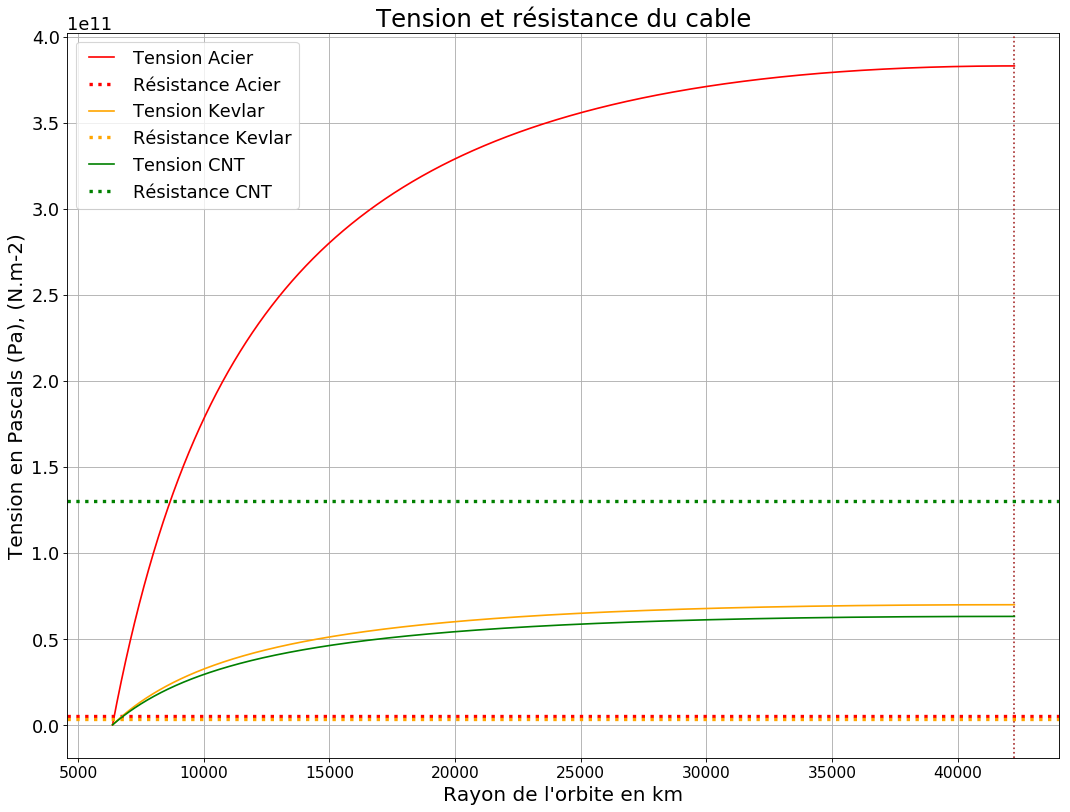

Tension maximum du cable au point Rg:
Tension Maximum par unité de masse: 0.048484587 Giga Pascals/kg
Tension maximum Rg, Acier: 383 Giga Pascals
Tension maximum Rg, Kevlar: 69 Giga Pascals
Tension maximum Rg, CNT: 63 Giga Pascals


In [24]:
r = np.arange(Rt, Rg, 1E3)
r_km = r*1E-3

plt.figure(figsize=(16, 12), dpi= 80, facecolor='w', edgecolor='k')
plt.axvline(x=Rg*1E-3, linestyle=":", color="brown")

#Acier:
plt.plot(r_km, IntegraleAcc(r)*densite_acier, color="red", label="Tension Acier")
plt.axhline(y=Tmax_acier, linestyle=":", color="red", linewidth=3, label="Résistance Acier" )

#Kevlar:
plt.plot(r_km, IntegraleAcc(r)*densite_kevlar, color="orange", label="Tension Kevlar")
plt.axhline(y=Tmax_kevlar, linestyle=":", color="orange",linewidth=3, label="Résistance Kevlar")

#Carbon nanotubes:
plt.plot(r_km, IntegraleAcc(r)*densite_cnt, color="green", label="Tension CNT")
plt.axhline(y=Tmax_cnt, linestyle=":", color="green",linewidth=3, Label="Résistance CNT")

plt.xlabel("Rayon de l'orbite en km")
plt.ylabel("Tension en Pascals (Pa), (N.m-2)")
plt.grid()
plt.title("Tension et résistance du cable")
plt.legend(loc="upper left")
plt.savefig('images/materiaux.png')


plt.show()

print("Tension maximum du cable au point Rg:" )
print("Tension Maximum par unité de masse:", int(IntegraleAcc(Rg))*1E-9,"Giga Pascals/kg")
print("Tension maximum Rg, Acier:",  int(IntegraleAcc(Rg)*densite_acier*1E-9),  "Giga Pascals")
print("Tension maximum Rg, Kevlar:", int(IntegraleAcc(Rg)*densite_kevlar*1E-9), "Giga Pascals")
print("Tension maximum Rg, CNT:",    int(IntegraleAcc(Rg)*densite_cnt*1E-9),    "Giga Pascals")

### Conclusion du calcul:
Les valeurs obtenues correspondes à celles trouvées dans nore article de référence, ce qui nous a permis de vérifier les calculs.
Le cable de l'ascenseur est réalisable si l'on utilise des Carbon Nano Tubes